# Time Series Modeling

To catch up to this point, the workflow has been:

    1) Extract the value of each pixel color and count how often it occurs in every image
    2) Take the values from the a sample basemap and subtract those pixel colors from the maps with the traffic layer
    3) Cluster the pixel colors only present in the traffic data to identify ranges of colors
    5) Check the clustering outputs by masking images with each clustered colors to see how well and which clusters best separate traffic from  the basemap colors
    4) Use the identified cluster values to construct a time series of the number of pixels of each cluster per 30 minute time window.
    
Now, with all that done, it is time to see if this series is one that can be modeled well. I say "well" because all models are wrong, but some are useful. You can fit models to a random walk but that doesn't mean it will be helpful.

In [1]:
import pandas as pd
import numpy as np

In [36]:
#read in pandas dataframe
ts = pd.read_csv('../../data/class/timeseries/clustered_series_full.csv', index_col='date_time')
ts.index = pd.to_datetime(ts.index)


## Visualize

First, I explore if this time series is stationary.
There are three basic qualifications to claim this:

    1) Constant Mean
    2) Constant Variance / homoscedasticity
    3) Covariance is constant with time
    
If each of the color categories are stationary, a time series model can be built. If not, I'll need to stationarize the series before attempting to make any models with them.



In [25]:
help(ax)

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in the upper left
 |      corner a

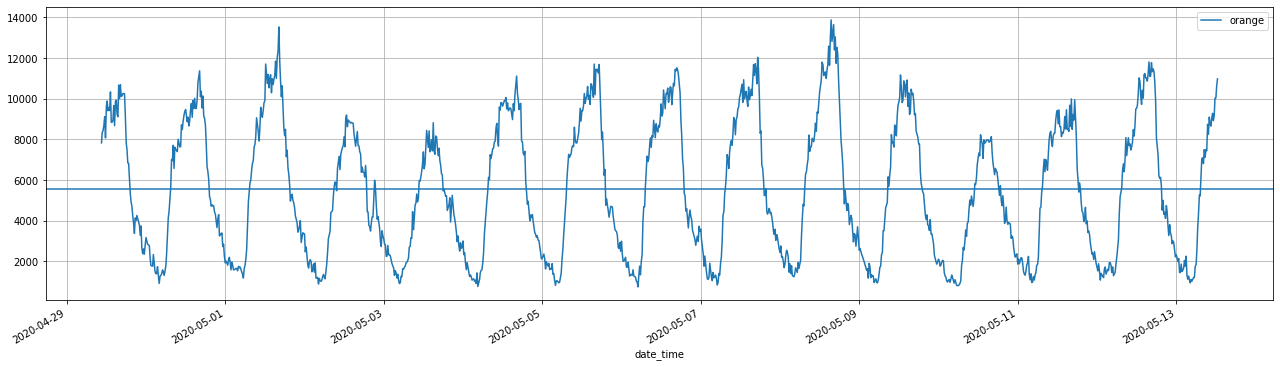

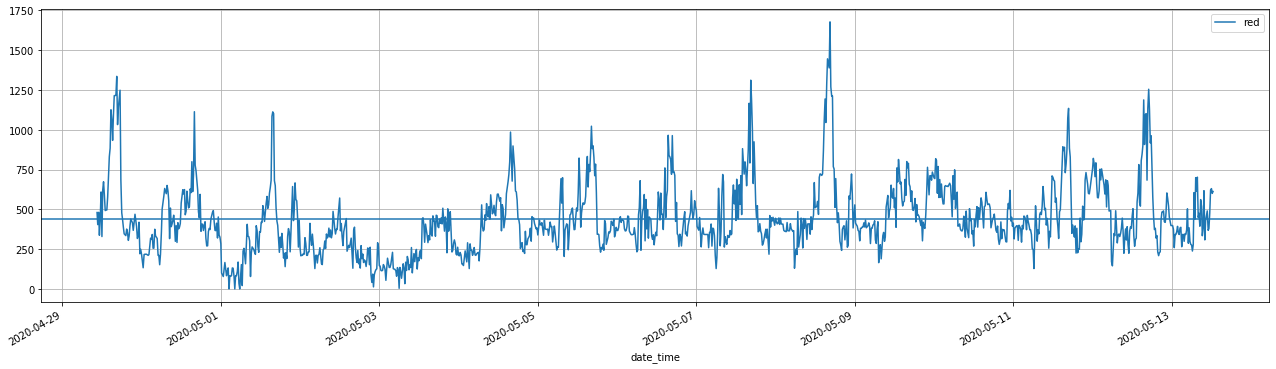

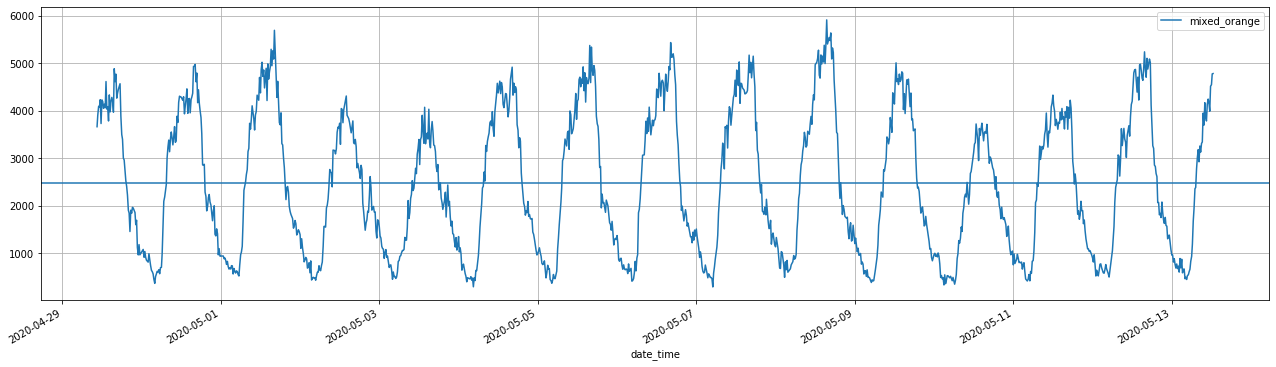

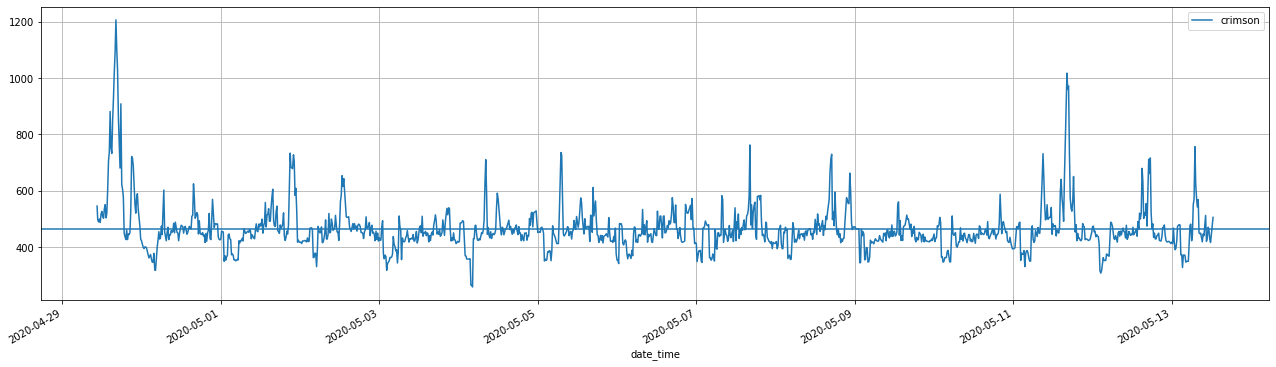

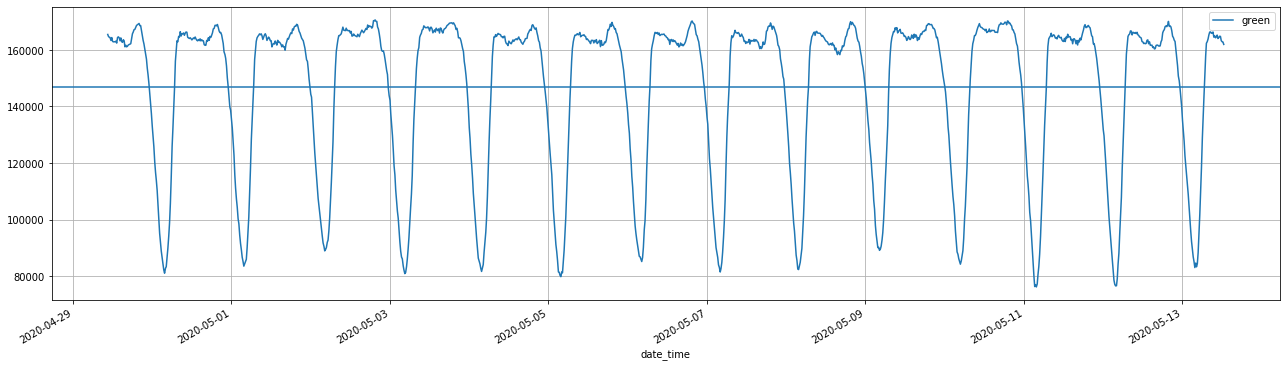

In [37]:
for i in ts.columns:
    ax = ts.plot(y=i, figsize=(22,6))
    ax.axhline(y=ts[i].mean())
    ax.grid()

## Stationarize (if necessary)

In [4]:
((60*24)/30)*7

336.0

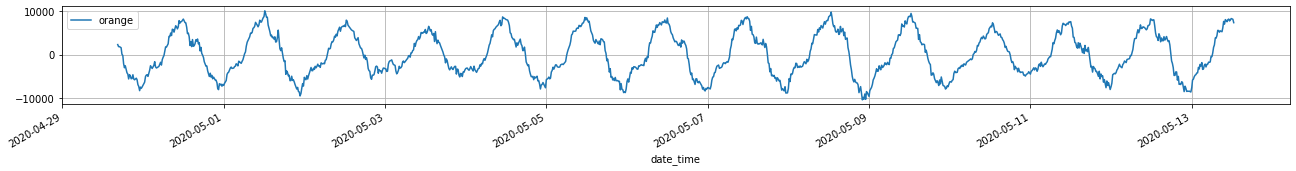

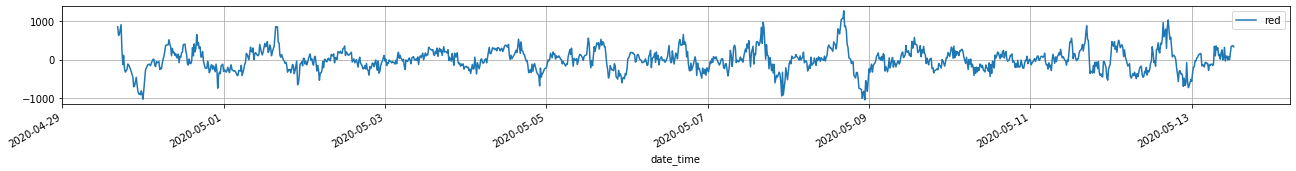

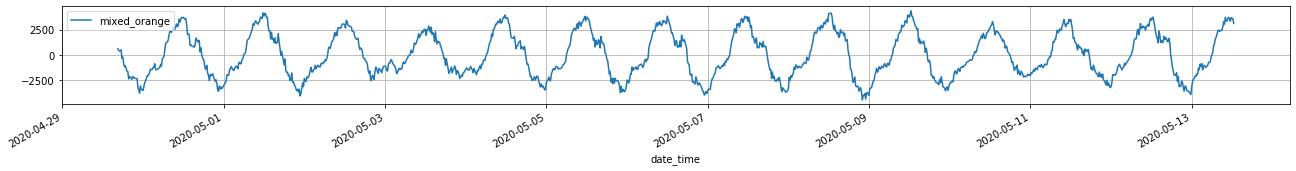

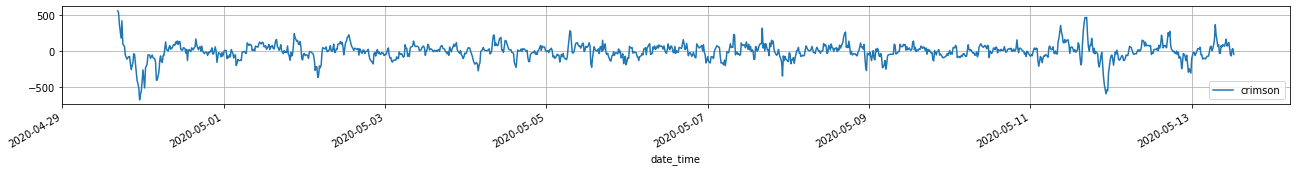

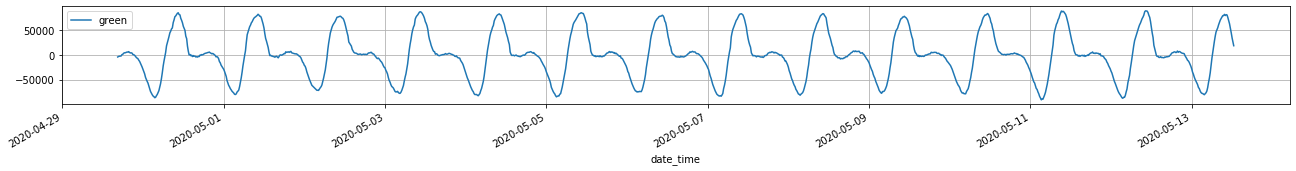

In [42]:
#differencing

diff = ts.diff(periods=24)

for i in ts.columns.tolist():
    ax = diff.plot(y=i, figsize=(22,2))
    ax.grid()

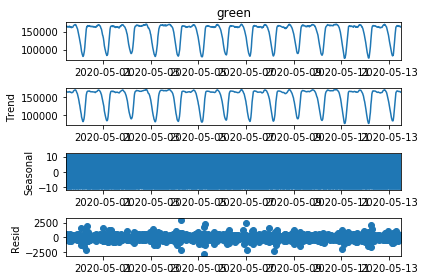

In [59]:
result = seasonal_decompose(ts['green'], model='additive', period=2)
result.plot()
pyplot.show()

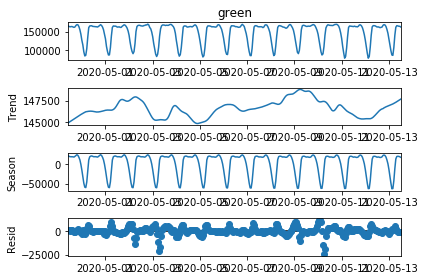

In [108]:
data = ts['green'].resample('H').mean().ffill()
stl = STL(data, seasonal = 25)
res = stl.fit()
fig = res.plot()

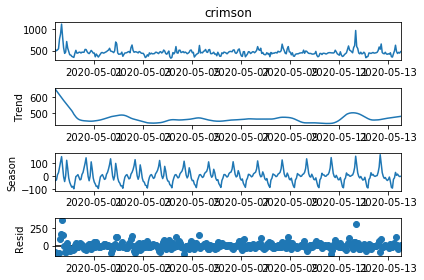

In [107]:
data = ts['crimson'].resample('H').mean().ffill()
stl = STL(data, seasonal = 25)
res = stl.fit()
fig = res.plot()

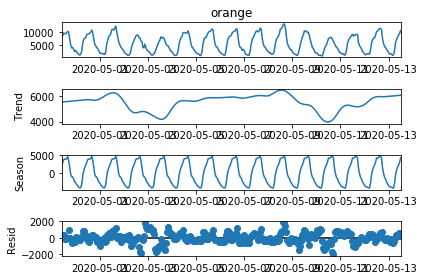

In [110]:
data = ts['orange'].resample('H').mean().ffill()
stl = STL(data, seasonal = 25)
res = stl.fit()
fig = res.plot()

## Identify Optimal Parameters

## Build Model

## Make Predictions